Spain Primera Division 

In [256]:
#Spain Primera Division 

In [257]:
%matplotlib inline 
import time,re,json,numpy as np
from collections import defaultdict,Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [258]:
import pandas as pd

import os
newpath = r'rojects.fivethirtyeight.com' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [259]:
!wget  https://projects.fivethirtyeight.com/data-webpage-data/datasets/soccer-spi.zip

--2022-11-28 16:38:31--  https://projects.fivethirtyeight.com/data-webpage-data/datasets/soccer-spi.zip
Resolving projects.fivethirtyeight.com (projects.fivethirtyeight.com)... 151.101.2.109, 151.101.66.109, 151.101.130.109, ...
Connecting to projects.fivethirtyeight.com (projects.fivethirtyeight.com)|151.101.2.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3160711 (3.0M) [application/zip]
Saving to: ‘soccer-spi.zip.5’

soccer-spi.zip.5    100%[===================>]   3.01M  --.-KB/s    in 0.08s   

2022-11-28 16:38:34 (38.2 MB/s) - ‘soccer-spi.zip.5’ saved [3160711/3160711]



In [260]:
from zipfile import ZipFile
file_name = "/content/soccer-spi.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [261]:
spix=pd.read_csv('/content/soccer-spi/spi_matches_latest.csv')
spix.to_excel('fivethirtyeight.xlsx')

football = spix[['league' ,'date' ,'team1', 'team2','prob1', 'prob2', 'probtie', 'score1',  'score2']]

In [262]:
#football = spix.loc[spix.league == 'Spanish Primera Division']

In [263]:
football = football.rename(columns={'league': 'Div', 'date': 'Date','team1': 'HomeTeam', 'team2': 'AwayTeam','score1': 'FTH', 'score2': 'FTA', 'prob1': 'Home', 'probtie': 'Draw', 'prob2': 'Away'})
football.head(1)

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA
0,Chinese Super League,2019-03-01,Shandong Luneng,Guizhou Renhe,0.5755,0.174,0.2505,1.0,0.0


In [264]:
#-----------------------------#-------------------------------------------------
def f(row):
    if row['FTH'] == row['FTA']:
        val = 'D'
    elif row['FTH'] > row['FTA']:
        val = 'H'
    elif row['FTH'] < row['FTA']:
        val = 'A'
    else:
      val = 'walo'
    
    return val
football['FT'] = football.apply(f, axis=1)
#football
#-----------------------------#-------------------------------------------------
def FT_odds_x1(row):
    if row['Home'] > row['Away'] and row['Home'] > row['Draw']:
        val = 'H'
    elif row['Draw'] > row['Away'] and row['Draw'] > row['Home']:
      val = 'D'
    elif row['Away'] > row['Home'] and row['Away'] > row['Draw']:
      val = 'A'
    else:
      val = 'walo'
    
    return val
football['FT_odds'] = football.apply(FT_odds_x1, axis=1)
#-----------------------------#-------------------------------------------------
def ok_no(row):
    if row['FT'] == row['FT_odds']:
        val = 'OK'
    else:
      val = 'NO'
    
    return val
football['ok_no'] = football.apply(ok_no, axis=1)
#-----------------------------#-------------------------------------------------
import numpy as np
football['WL'] = np.where(football['FT'] == football['FT_odds'], 1, 0)
#-----------------------------#-------------------------------------------------
football.head(1)

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
0,Chinese Super League,2019-03-01,Shandong Luneng,Guizhou Renhe,0.5755,0.174,0.2505,1.0,0.0,H,H,OK,1


In [265]:
football=football.loc[(football.Date <= '2022-11-10')]

In [266]:
football=football[football.FTH != '-']
football=football[football.FTH != 'NaN']
football=football[football.FT != 'walo']

In [267]:
football=football[football.FTA != '-']
football=football[football.FTA != 'NaN']
football=football[football.FT != 'walo']

In [268]:
#football=football[football.Tips != 'NaN']

In [269]:
football.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
Home        0
Away        0
Draw        0
FTH         0
FTA         0
FT          0
FT_odds     0
ok_no       0
WL          0
dtype: int64

In [270]:
football.shape

(6633, 13)

In [271]:
# changing the max_rows value
pd.set_option("display.max_rows", 2919)
#display(football)

In [272]:
Spain=football.loc[(football.Div == 'Spanish Primera Division')]
Spain

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2446,Spanish Primera Division,2022-08-12,Osasuna,Sevilla FC,0.3443,0.3590,0.2968,2.0,1.0,H,A,NO,0
2520,Spanish Primera Division,2022-08-13,Celta Vigo,Espanyol,0.5358,0.1994,0.2648,2.0,2.0,D,H,NO,0
2536,Spanish Primera Division,2022-08-13,Real Valladolid,Villarreal,0.2456,0.5033,0.2510,0.0,3.0,A,A,OK,1
2565,Spanish Primera Division,2022-08-13,Barcelona,Rayo Vallecano,0.7269,0.0906,0.1825,0.0,0.0,D,H,NO,0
2642,Spanish Primera Division,2022-08-14,Cadiz,Real Sociedad,0.2948,0.4245,0.2808,0.0,1.0,A,A,OK,1
2660,Spanish Primera Division,2022-08-14,Valencia,Girona FC,0.5299,0.2044,0.2657,1.0,0.0,H,H,OK,1
2679,Spanish Primera Division,2022-08-14,Almeria,Real Madrid,0.1430,0.6651,0.1918,1.0,2.0,A,A,OK,1
2694,Spanish Primera Division,2022-08-15,Athletic Bilbao,Mallorca,0.5902,0.1646,0.2452,0.0,0.0,D,H,NO,0
2701,Spanish Primera Division,2022-08-15,Getafe,Atletico Madrid,0.2312,0.4817,0.2871,0.0,3.0,A,A,OK,1
2708,Spanish Primera Division,2022-08-15,Real Betis,Elche,0.5672,0.1811,0.2517,3.0,0.0,H,H,OK,1


In [273]:
df=Spain
dfx = df[['Div','WL']]
dfx = dfx.groupby(['Div']).sum()
dfx = dfx.sort_values(['WL'], ascending= False)
dfx.head(20)

,WL
Div,
Spanish Primera Division,75


In [274]:
ss = Spain.groupby(['Div']).sum()
ss

,Home,Away,Draw,FTH,FTA,WL
Div,,,,,,
Spanish Primera Division,61.842,42.1124,36.0439,195.0,161.0,75


In [275]:
Spain.loc[(Spain.HomeTeam == 'Real Betis')]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2708,Spanish Primera Division,2022-08-15,Real Betis,Elche,0.5672,0.1811,0.2517,3.0,0.0,H,H,OK,1
3090,Spanish Primera Division,2022-08-26,Real Betis,Osasuna,0.5371,0.2001,0.2627,1.0,0.0,H,H,OK,1
4024,Spanish Primera Division,2022-09-11,Real Betis,Villarreal,0.3354,0.3958,0.2688,1.0,0.0,H,A,NO,0
4412,Spanish Primera Division,2022-09-18,Real Betis,Girona FC,0.5707,0.1773,0.2520,2.0,1.0,H,H,OK,1
5554,Spanish Primera Division,2022-10-16,Real Betis,Almeria,0.5604,0.1750,0.2646,3.0,1.0,H,H,OK,1
5851,Spanish Primera Division,2022-10-23,Real Betis,Atletico Madrid,0.3383,0.3696,0.2920,1.0,2.0,A,A,OK,1
6561,Spanish Primera Division,2022-11-06,Real Betis,Sevilla FC,0.5153,0.2030,0.2817,1.0,1.0,D,H,NO,0


In [276]:
Spain.loc[(Spain.AwayTeam == 'Real Betis')]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2895,Spanish Primera Division,2022-08-20,Mallorca,Real Betis,0.2885,0.4354,0.2761,1.0,2.0,A,A,OK,1
3541,Spanish Primera Division,2022-09-03,Real Madrid,Real Betis,0.6689,0.1359,0.1952,2.0,1.0,H,H,OK,1
4778,Spanish Primera Division,2022-10-02,Celta Vigo,Real Betis,0.4033,0.3128,0.2839,1.0,0.0,H,H,OK,1
5117,Spanish Primera Division,2022-10-09,Real Valladolid,Real Betis,0.3123,0.4118,0.2759,0.0,0.0,D,A,NO,0
5621,Spanish Primera Division,2022-10-19,Cadiz,Real Betis,0.2864,0.4242,0.2894,0.0,0.0,D,A,NO,0
6247,Spanish Primera Division,2022-10-30,Real Sociedad,Real Betis,0.5103,0.2053,0.2844,0.0,2.0,A,H,NO,0
6646,Spanish Primera Division,2022-11-10,Valencia,Real Betis,0.4065,0.3043,0.2891,3.0,0.0,H,H,OK,1


In [277]:
Spain.groupby('ok_no')['ok_no'].count()

ok_no
NO    65
OK    75
Name: ok_no, dtype: int64

In [278]:
Spain.groupby('FT')['FT'].count()

FT
A    46
D    33
H    61
Name: FT, dtype: int64

In [279]:
Spain.loc[(Spain.Div == 'Spanish Primera Division') & (Spain.Home >= 0.54)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2565,Spanish Primera Division,2022-08-13,Barcelona,Rayo Vallecano,0.7269,0.0906,0.1825,0.0,0.0,D,H,NO,0
2694,Spanish Primera Division,2022-08-15,Athletic Bilbao,Mallorca,0.5902,0.1646,0.2452,0.0,0.0,D,H,NO,0
2708,Spanish Primera Division,2022-08-15,Real Betis,Elche,0.5672,0.1811,0.2517,3.0,0.0,H,H,OK,1
2795,Spanish Primera Division,2022-08-19,Sevilla FC,Real Valladolid,0.5523,0.1854,0.2623,1.0,1.0,D,H,NO,0
3309,Spanish Primera Division,2022-08-28,Barcelona,Real Valladolid,0.7758,0.0669,0.1572,4.0,0.0,H,H,OK,1
3541,Spanish Primera Division,2022-09-03,Real Madrid,Real Betis,0.6689,0.1359,0.1952,2.0,1.0,H,H,OK,1
3644,Spanish Primera Division,2022-09-04,Athletic Bilbao,Espanyol,0.5985,0.1521,0.2494,0.0,1.0,A,H,NO,0
3673,Spanish Primera Division,2022-09-04,Villarreal,Elche,0.7059,0.0970,0.1971,4.0,0.0,H,H,OK,1
3907,Spanish Primera Division,2022-09-10,Atletico Madrid,Celta Vigo,0.6050,0.1518,0.2432,4.0,1.0,H,H,OK,1
3955,Spanish Primera Division,2022-09-11,Real Madrid,Mallorca,0.8355,0.0472,0.1173,4.0,1.0,H,H,OK,1


In [280]:
Spain.loc[(Spain.Div == 'Spanish Primera Division') & (Spain.Home >= 0.61)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2565,Spanish Primera Division,2022-08-13,Barcelona,Rayo Vallecano,0.7269,0.0906,0.1825,0.0,0.0,D,H,NO,0
3309,Spanish Primera Division,2022-08-28,Barcelona,Real Valladolid,0.7758,0.0669,0.1572,4.0,0.0,H,H,OK,1
3541,Spanish Primera Division,2022-09-03,Real Madrid,Real Betis,0.6689,0.1359,0.1952,2.0,1.0,H,H,OK,1
3673,Spanish Primera Division,2022-09-04,Villarreal,Elche,0.7059,0.0970,0.1971,4.0,0.0,H,H,OK,1
3955,Spanish Primera Division,2022-09-11,Real Madrid,Mallorca,0.8355,0.0472,0.1173,4.0,1.0,H,H,OK,1
4263,Spanish Primera Division,2022-09-17,Barcelona,Elche,0.8455,0.0405,0.1140,3.0,0.0,H,H,OK,1
4389,Spanish Primera Division,2022-09-18,Villarreal,Sevilla FC,0.6334,0.1456,0.2210,1.0,1.0,D,H,NO,0
4567,Spanish Primera Division,2022-09-30,Athletic Bilbao,Almeria,0.6145,0.1446,0.2410,4.0,0.0,H,H,OK,1
4816,Spanish Primera Division,2022-10-02,Real Madrid,Osasuna,0.7441,0.0868,0.1691,1.0,1.0,D,H,NO,0
5043,Spanish Primera Division,2022-10-08,Atletico Madrid,Girona FC,0.6815,0.1125,0.2060,2.0,1.0,H,H,OK,1


In [281]:
Spain.loc[(Spain.FT_odds == 'H') & (Spain.Home >= 0.65)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2565,Spanish Primera Division,2022-08-13,Barcelona,Rayo Vallecano,0.7269,0.0906,0.1825,0.0,0.0,D,H,NO,0
3309,Spanish Primera Division,2022-08-28,Barcelona,Real Valladolid,0.7758,0.0669,0.1572,4.0,0.0,H,H,OK,1
3541,Spanish Primera Division,2022-09-03,Real Madrid,Real Betis,0.6689,0.1359,0.1952,2.0,1.0,H,H,OK,1
3673,Spanish Primera Division,2022-09-04,Villarreal,Elche,0.7059,0.0970,0.1971,4.0,0.0,H,H,OK,1
3955,Spanish Primera Division,2022-09-11,Real Madrid,Mallorca,0.8355,0.0472,0.1173,4.0,1.0,H,H,OK,1
4263,Spanish Primera Division,2022-09-17,Barcelona,Elche,0.8455,0.0405,0.1140,3.0,0.0,H,H,OK,1
4816,Spanish Primera Division,2022-10-02,Real Madrid,Osasuna,0.7441,0.0868,0.1691,1.0,1.0,D,H,NO,0
5043,Spanish Primera Division,2022-10-08,Atletico Madrid,Girona FC,0.6815,0.1125,0.2060,2.0,1.0,H,H,OK,1
5197,Spanish Primera Division,2022-10-09,Barcelona,Celta Vigo,0.7330,0.0852,0.1818,1.0,0.0,H,H,OK,1
5609,Spanish Primera Division,2022-10-18,Atletico Madrid,Rayo Vallecano,0.6701,0.1112,0.2187,1.0,1.0,D,H,NO,0


In [282]:
Spain.loc[(Spain.FT_odds == 'H') & (Spain.Home >= 0.70)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2565,Spanish Primera Division,2022-08-13,Barcelona,Rayo Vallecano,0.7269,0.0906,0.1825,0.0,0.0,D,H,NO,0
3309,Spanish Primera Division,2022-08-28,Barcelona,Real Valladolid,0.7758,0.0669,0.1572,4.0,0.0,H,H,OK,1
3673,Spanish Primera Division,2022-09-04,Villarreal,Elche,0.7059,0.0970,0.1971,4.0,0.0,H,H,OK,1
3955,Spanish Primera Division,2022-09-11,Real Madrid,Mallorca,0.8355,0.0472,0.1173,4.0,1.0,H,H,OK,1
4263,Spanish Primera Division,2022-09-17,Barcelona,Elche,0.8455,0.0405,0.1140,3.0,0.0,H,H,OK,1
4816,Spanish Primera Division,2022-10-02,Real Madrid,Osasuna,0.7441,0.0868,0.1691,1.0,1.0,D,H,NO,0
5197,Spanish Primera Division,2022-10-09,Barcelona,Celta Vigo,0.7330,0.0852,0.1818,1.0,0.0,H,H,OK,1
5790,Spanish Primera Division,2022-10-22,Real Madrid,Sevilla FC,0.7606,0.0780,0.1614,3.0,1.0,H,H,OK,1
6208,Spanish Primera Division,2022-10-30,Real Madrid,Girona FC,0.7907,0.0685,0.1407,1.0,1.0,D,H,NO,0
6462,Spanish Primera Division,2022-11-05,Barcelona,Almeria,0.8212,0.0508,0.1280,2.0,0.0,H,H,OK,1


In [283]:
Spain.loc[(Spain.FT_odds == 'A') & (Spain.Away >= 0.70)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
3880,Spanish Primera Division,2022-09-10,Cadiz,Barcelona,0.1162,0.7003,0.1835,0.0,4.0,A,A,OK,1
4705,Spanish Primera Division,2022-10-01,Mallorca,Barcelona,0.1081,0.7084,0.1834,0.0,1.0,A,A,OK,1
5643,Spanish Primera Division,2022-10-19,Elche,Real Madrid,0.0897,0.7563,0.1539,0.0,3.0,A,A,OK,1


In [284]:
Spain.loc[Spain.HomeTeam.isin(['Real Madrid','FC Barcelona'])]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
3541,Spanish Primera Division,2022-09-03,Real Madrid,Real Betis,0.6689,0.1359,0.1952,2.0,1.0,H,H,OK,1
3955,Spanish Primera Division,2022-09-11,Real Madrid,Mallorca,0.8355,0.0472,0.1173,4.0,1.0,H,H,OK,1
4816,Spanish Primera Division,2022-10-02,Real Madrid,Osasuna,0.7441,0.0868,0.1691,1.0,1.0,D,H,NO,0
5520,Spanish Primera Division,2022-10-16,Real Madrid,Barcelona,0.4588,0.3042,0.2370,3.0,1.0,H,H,OK,1
5790,Spanish Primera Division,2022-10-22,Real Madrid,Sevilla FC,0.7606,0.0780,0.1614,3.0,1.0,H,H,OK,1
6208,Spanish Primera Division,2022-10-30,Real Madrid,Girona FC,0.7907,0.0685,0.1407,1.0,1.0,D,H,NO,0
6650,Spanish Primera Division,2022-11-10,Real Madrid,Cadiz,0.8232,0.0525,0.1242,2.0,1.0,H,H,OK,1


In [285]:
Spain.loc[(Spain.FT_odds == 'H') & (Spain.Home >= 0.57)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2565,Spanish Primera Division,2022-08-13,Barcelona,Rayo Vallecano,0.7269,0.0906,0.1825,0.0,0.0,D,H,NO,0
2694,Spanish Primera Division,2022-08-15,Athletic Bilbao,Mallorca,0.5902,0.1646,0.2452,0.0,0.0,D,H,NO,0
3309,Spanish Primera Division,2022-08-28,Barcelona,Real Valladolid,0.7758,0.0669,0.1572,4.0,0.0,H,H,OK,1
3541,Spanish Primera Division,2022-09-03,Real Madrid,Real Betis,0.6689,0.1359,0.1952,2.0,1.0,H,H,OK,1
3644,Spanish Primera Division,2022-09-04,Athletic Bilbao,Espanyol,0.5985,0.1521,0.2494,0.0,1.0,A,H,NO,0
3673,Spanish Primera Division,2022-09-04,Villarreal,Elche,0.7059,0.0970,0.1971,4.0,0.0,H,H,OK,1
3907,Spanish Primera Division,2022-09-10,Atletico Madrid,Celta Vigo,0.6050,0.1518,0.2432,4.0,1.0,H,H,OK,1
3955,Spanish Primera Division,2022-09-11,Real Madrid,Mallorca,0.8355,0.0472,0.1173,4.0,1.0,H,H,OK,1
4263,Spanish Primera Division,2022-09-17,Barcelona,Elche,0.8455,0.0405,0.1140,3.0,0.0,H,H,OK,1
4310,Spanish Primera Division,2022-09-17,Athletic Bilbao,Rayo Vallecano,0.5936,0.1566,0.2498,3.0,2.0,H,H,OK,1


In [286]:
Spain.loc[(Spain.FT_odds == 'A') & (Spain.Away >= 0.57)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2679,Spanish Primera Division,2022-08-14,Almeria,Real Madrid,0.1430,0.6651,0.1918,1.0,2.0,A,A,OK,1
2912,Spanish Primera Division,2022-08-20,Celta Vigo,Real Madrid,0.1894,0.5899,0.2207,1.0,4.0,A,A,OK,1
3330,Spanish Primera Division,2022-08-28,Espanyol,Real Madrid,0.1316,0.6820,0.1864,1.0,3.0,A,A,OK,1
3880,Spanish Primera Division,2022-09-10,Cadiz,Barcelona,0.1162,0.7003,0.1835,0.0,4.0,A,A,OK,1
4705,Spanish Primera Division,2022-10-01,Mallorca,Barcelona,0.1081,0.7084,0.1834,0.0,1.0,A,A,OK,1
5084,Spanish Primera Division,2022-10-08,Getafe,Real Madrid,0.1315,0.6753,0.1932,0.0,1.0,A,A,OK,1
5643,Spanish Primera Division,2022-10-19,Elche,Real Madrid,0.0897,0.7563,0.1539,0.0,3.0,A,A,OK,1
6153,Spanish Primera Division,2022-10-29,Valencia,Barcelona,0.1922,0.5830,0.2248,0.0,1.0,A,A,OK,1
6572,Spanish Primera Division,2022-11-07,Rayo Vallecano,Real Madrid,0.1822,0.6033,0.2145,3.0,2.0,H,A,NO,0
6604,Spanish Primera Division,2022-11-08,Osasuna,Barcelona,0.1844,0.5808,0.2347,1.0,2.0,A,A,OK,1


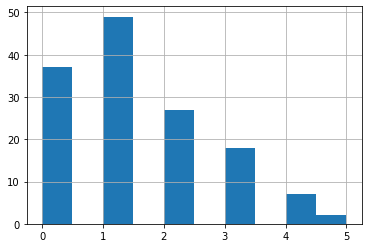

In [287]:
Spain['FTH'].hist()

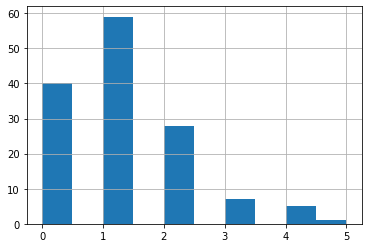

In [288]:
Spain['FTA'].hist()

In [289]:
Spain.groupby('ok_no')[['Home']].aggregate(lambda x: x.sum() / len(x))

,Home
ok_no,
NO,0.432752
OK,0.449508


In [290]:
Spain.groupby(['Div','WL']).sum().head(8)

Home     Away     Draw    FTH   FTA
Div                      WL                                        
Spanish Primera Division 0   28.1289  19.2912  17.5792   63.0  74.0
                         1   33.7131  22.8212  18.4647  132.0  87.0

In [291]:
Spain.groupby(['Div','ok_no']).sum().head(8)

Home     Away     Draw    FTH   FTA  WL
Div                      ok_no                                            
Spanish Primera Division NO     28.1289  19.2912  17.5792   63.0  74.0   0
                         OK     33.7131  22.8212  18.4647  132.0  87.0  75

In [292]:
Spain['FT'].value_counts()

H    61
A    46
D    33
Name: FT, dtype: int64

In [293]:
Spain['WL'].value_counts()

1    75
0    65
Name: WL, dtype: int64

In [294]:
Spain['ok_no'].value_counts()

OK    75
NO    65
Name: ok_no, dtype: int64

In [295]:
Spain['Div'].value_counts()

Spanish Primera Division    140
Name: Div, dtype: int64

In [296]:
Spain[["HomeTeam", "AwayTeam"]].nunique()

HomeTeam    20
AwayTeam    20
dtype: int64

In [297]:
Spain.groupby('Div')[['WL']].aggregate(lambda x: x.sum() / len(x))

,WL
Div,
Spanish Primera Division,0.535714


In [298]:
football.loc[(football.FT_odds == 'H')& (football.Home >= 0.57)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
0,Chinese Super League,2019-03-01,Shandong Luneng,Guizhou Renhe,0.5755,0.1740,0.2505,1.0,0.0,H,H,OK,1
2,Chinese Super League,2019-03-01,Guangzhou Evergrande,Tianjin Quanujian,0.7832,0.0673,0.1495,3.0,0.0,H,H,OK,1
7,Chinese Super League,2019-03-03,Jiangsu Suning FC,Tianjin Teda,0.6289,0.1423,0.2288,3.0,2.0,H,H,OK,1
8,Chinese Super League,2019-03-08,Guangzhou Evergrande,Tianjin Teda,0.8157,0.0535,0.1309,1.0,0.0,H,H,OK,1
10,Chinese Super League,2019-03-08,Shandong Luneng,Henan Jianye,0.6068,0.1521,0.2411,2.0,2.0,D,H,NO,0
23,Chinese Super League,2019-03-31,Jiangsu Suning FC,Wuhan Zall,0.6789,0.1056,0.2155,2.0,1.0,H,H,OK,1
25,Chinese Super League,2019-04-05,Shanghai SIPG,Chongqing Lifan,0.7527,0.0774,0.1700,2.0,3.0,A,H,NO,0
28,Chinese Super League,2019-04-06,Guangzhou Evergrande,Guangzhou RF,0.7738,0.0812,0.1449,2.0,0.0,H,H,OK,1
37,Chinese Super League,2019-04-14,Beijing Guoan,Henan Jianye,0.7227,0.0879,0.1894,2.0,1.0,H,H,OK,1
38,Chinese Super League,2019-04-14,Shanghai SIPG,Wuhan Zall,0.7375,0.0833,0.1792,2.0,1.0,H,H,OK,1


In [299]:
xx057=football.loc[(football.FT_odds == 'H')  & (football.Home >= 0.57)]
xx057["FT"].value_counts()

H    816
D    224
A    156
Name: FT, dtype: int64

In [300]:
football.loc[(football.FT_odds == 'H') & (football.Home >= 0.70)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL
2,Chinese Super League,2019-03-01,Guangzhou Evergrande,Tianjin Quanujian,0.7832,0.0673,0.1495,3.0,0.0,H,H,OK,1
8,Chinese Super League,2019-03-08,Guangzhou Evergrande,Tianjin Teda,0.8157,0.0535,0.1309,1.0,0.0,H,H,OK,1
25,Chinese Super League,2019-04-05,Shanghai SIPG,Chongqing Lifan,0.7527,0.0774,0.1700,2.0,3.0,A,H,NO,0
28,Chinese Super League,2019-04-06,Guangzhou Evergrande,Guangzhou RF,0.7738,0.0812,0.1449,2.0,0.0,H,H,OK,1
37,Chinese Super League,2019-04-14,Beijing Guoan,Henan Jianye,0.7227,0.0879,0.1894,2.0,1.0,H,H,OK,1
38,Chinese Super League,2019-04-14,Shanghai SIPG,Wuhan Zall,0.7375,0.0833,0.1792,2.0,1.0,H,H,OK,1
56,Chinese Super League,2019-05-04,Shanghai SIPG,Guangzhou RF,0.7036,0.1188,0.1777,2.0,0.0,H,H,OK,1
70,Chinese Super League,2019-05-12,Beijing Guoan,Shenzhen FC,0.7423,0.0798,0.1779,3.0,0.0,H,H,OK,1
73,Chinese Super League,2019-05-17,Beijing Guoan,Tianjin Quanujian,0.7922,0.0552,0.1526,2.0,1.0,H,H,OK,1
84,Chinese Super League,2019-05-26,Guangzhou Evergrande,Shenzhen FC,0.7930,0.0572,0.1498,1.0,0.0,H,H,OK,1


In [301]:
xx=football.loc[(football.FT_odds == 'H') & (football.Home >= 0.70)]
xx["FT"].value_counts()

H    265
D     47
A     22
Name: FT, dtype: int64

In [302]:
football.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
Home        0
Away        0
Draw        0
FTH         0
FTA         0
FT          0
FT_odds     0
ok_no       0
WL          0
dtype: int64

In [303]:
football[football.isnull().any(axis=1)]

,Div,Date,HomeTeam,AwayTeam,Home,Away,Draw,FTH,FTA,FT,FT_odds,ok_no,WL


In [304]:
set(football.Div)

{'Argentina Primera Division',
 'Australian A-League',
 'Austrian T-Mobile Bundesliga',
 'Barclays Premier League',
 'Belgian Jupiler League',
 'Brasileiro Série A',
 'Chinese Super League',
 'Danish SAS-Ligaen',
 'Dutch Eredivisie',
 'English League Championship',
 'English League One',
 'English League Two',
 "FA Women's Super League",
 'French Ligue 1',
 'French Ligue 2',
 'German 2. Bundesliga',
 'German Bundesliga',
 'Greek Super League',
 'Italy Serie A',
 'Italy Serie B',
 'Japanese J League',
 'Major League Soccer',
 'Mexican Primera Division Torneo Apertura',
 'Mexican Primera Division Torneo Clausura',
 'NWSL Challenge Cup',
 "National Women's Soccer League",
 'Norwegian Tippeligaen',
 'Portuguese Liga',
 'Russian Premier Liga',
 'Scottish Premiership',
 'South African ABSA Premier League',
 'Spanish Primera Division',
 'Spanish Segunda Division',
 'Swedish Allsvenskan',
 'Swiss Raiffeisen Super League',
 'Turkish Turkcell Super Lig',
 'UEFA Champions League',
 'UEFA Europa C

In [305]:
len(set(football.Div))

40

In [306]:
football["Div"].value_counts()

Major League Soccer                         489
United Soccer League                        471
Argentina Primera Division                  378
Brasileiro Série A                          370
Japanese J League                           306
Chinese Super League                        240
Swedish Allsvenskan                         240
English League Championship                 237
Norwegian Tippeligaen                       232
English League Two                          202
English League One                          200
Mexican Primera Division Torneo Clausura    171
Mexican Primera Division Torneo Apertura    171
Spanish Segunda Division                    165
German 2. Bundesliga                        144
Belgian Jupiler League                      143
Italy Serie A                               140
Spanish Primera Division                    140
French Ligue 1                              140
French Ligue 2                              140
National Women's Soccer League          

In [307]:
football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6633 entries, 0 to 6652
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       6633 non-null   object 
 1   Date      6633 non-null   object 
 2   HomeTeam  6633 non-null   object 
 3   AwayTeam  6633 non-null   object 
 4   Home      6633 non-null   float64
 5   Away      6633 non-null   float64
 6   Draw      6633 non-null   float64
 7   FTH       6633 non-null   float64
 8   FTA       6633 non-null   float64
 9   FT        6633 non-null   object 
 10  FT_odds   6633 non-null   object 
 11  ok_no     6633 non-null   object 
 12  WL        6633 non-null   int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 725.5+ KB


In [308]:
football.groupby('Div')[['WL']].aggregate(lambda x: x.sum() / len(x))

,WL
Div,
Argentina Primera Division,0.433862
Australian A-League,0.482759
Austrian T-Mobile Bundesliga,0.522222
Barclays Premier League,0.522059
Belgian Jupiler League,0.587413
Brasileiro Série A,0.486486
Chinese Super League,0.600000
Danish SAS-Ligaen,0.458333
Dutch Eredivisie,0.529915


In [309]:
df=football
dfx = df[['Div','WL']]
dfx = dfx.groupby(['Div']).sum()
dfx = dfx.sort_values(['WL'], ascending= False)
dfx

,WL
Div,
United Soccer League,257
Major League Soccer,240
Brasileiro Série A,180
Argentina Primera Division,164
Chinese Super League,144
Swedish Allsvenskan,126
Japanese J League,125
Norwegian Tippeligaen,120
English League Championship,103


0.57

In [315]:
xx70=football.loc[(football.FT_odds == 'H') & (football.Home >= 0.57)]
xx70.groupby('Div')[['WL']].aggregate(lambda x: x.sum() / len(x))

,WL
Div,
Argentina Primera Division,0.552632
Australian A-League,0.800000
Austrian T-Mobile Bundesliga,0.611111
Barclays Premier League,0.833333
Belgian Jupiler League,0.702703
Brasileiro Série A,0.705882
Chinese Super League,0.823529
Danish SAS-Ligaen,0.375000
Dutch Eredivisie,0.655172
